In [1]:
import pandas as pd
import numpy as np
import shap

In [2]:
import pickle
f = open("output/bestmodel.pickle","rb")
model = pickle.load(f)

f = open("output/train_info.pickle","rb")
train_x, train_y, num_x, cat_x = pickle.load(f)

In [13]:
shap.initjs()
# model = get_pipeline(xgb.XGBRegressor()).fit(train_x,train_y)
explainer = shap.TreeExplainer(model.named_steps["model"])
observations = model.named_steps["preprocess"].transform(train_x.sample(100, random_state=42))
shap_values = explainer.shap_values(observations)
all_x = num_x + list(model['preprocess'].transformers_[1][1]['onehot_cat'].get_feature_names(cat_x))

i = 0
shap.force_plot(explainer.expected_value, shap_values[i], 
                features=observations.toarray()[i], feature_names=all_x)

In [4]:
shap.initjs()
# model = get_pipeline(xgb.XGBRegressor()).fit(train_x,train_y)
explainer = shap.TreeExplainer(model.named_steps["model"])
observations = model.named_steps["preprocess"].transform(train_x.sample(100, random_state=42))
shap_values = explainer.shap_values(observations)
all_x = num_x + list(model['preprocess'].transformers_[1][1]['onehot_cat'].get_feature_names(cat_x))

i = 0
shap.force_plot(explainer.expected_value, shap_values[i], 
                features=observations.toarray()[i], feature_names=all_x)

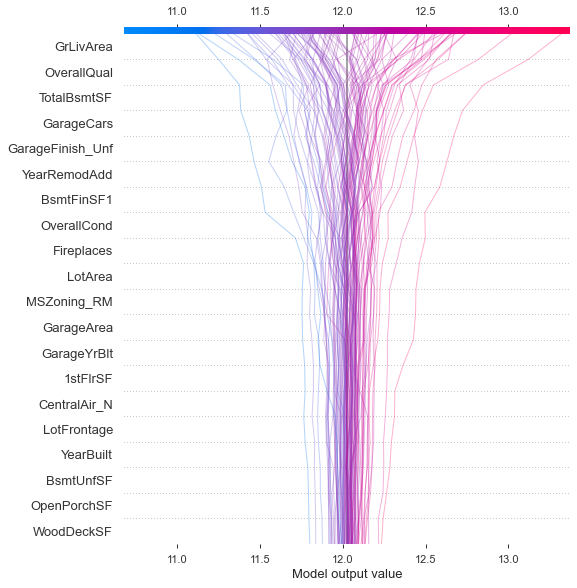

In [130]:
shap.decision_plot(explainer.expected_value, shap_values, all_x,alpha=0.3)

In [118]:
shap.force_plot(explainer.expected_value, shap_values,
                features=observations.toarray(), feature_names=all_x)

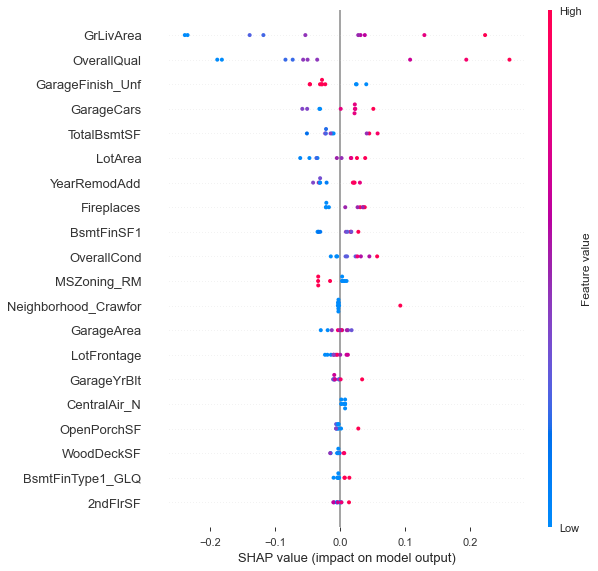

In [119]:
shap.summary_plot(shap_values, features=observations.toarray(), feature_names=all_x)

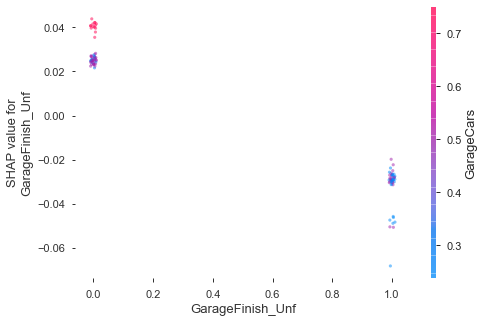

In [137]:
shap.dependence_plot("GarageFinish_Unf", shap_values, 
                     pd.DataFrame(observations.toarray(), columns=all_x), dot_size=10, x_jitter=0.02, alpha=0.5)

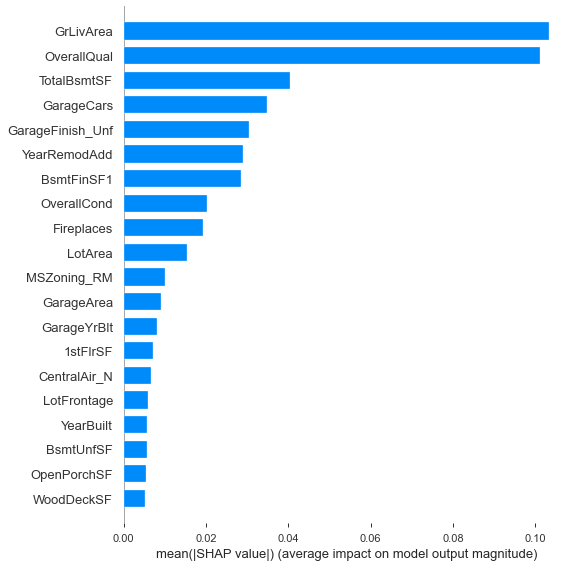

In [126]:
shap.summary_plot(shap_values, observations.toarray(), plot_type="bar", feature_names=all_x)

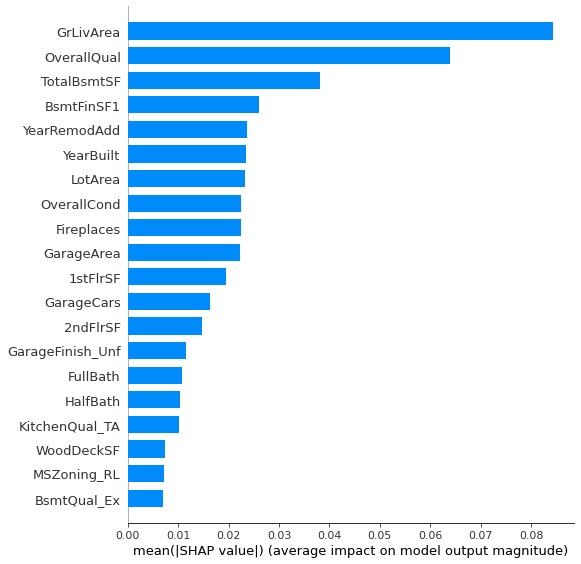

In [5]:
shap.summary_plot(shap_values, observations.toarray(), plot_type="bar", feature_names=all_x)

In [17]:
import aoc
import altair as alt
df = aoc.nan_inspect(train_x).reset_index()
df = df.melt('index', var_name='to', value_name='corr')
plt.figure(figsize=(15, 15))
alt.Chart(df).mark_rect().encode(
    x=alt.X('index:O',sort=alt.EncodingSortField(field="corr", op="sum", order='descending')),
    y=alt.Y('to:O',sort=alt.EncodingSortField(field="corr", op="sum", order='descending')),
    color='corr:Q'
)


1       2
2      16
3     132
4     635
5     501
6      58
7       5
8       5
9      32
10     60
11      7
14      3
15      4
dtype: int64


alt.Chart(...)

<Figure size 1080x1080 with 0 Axes>

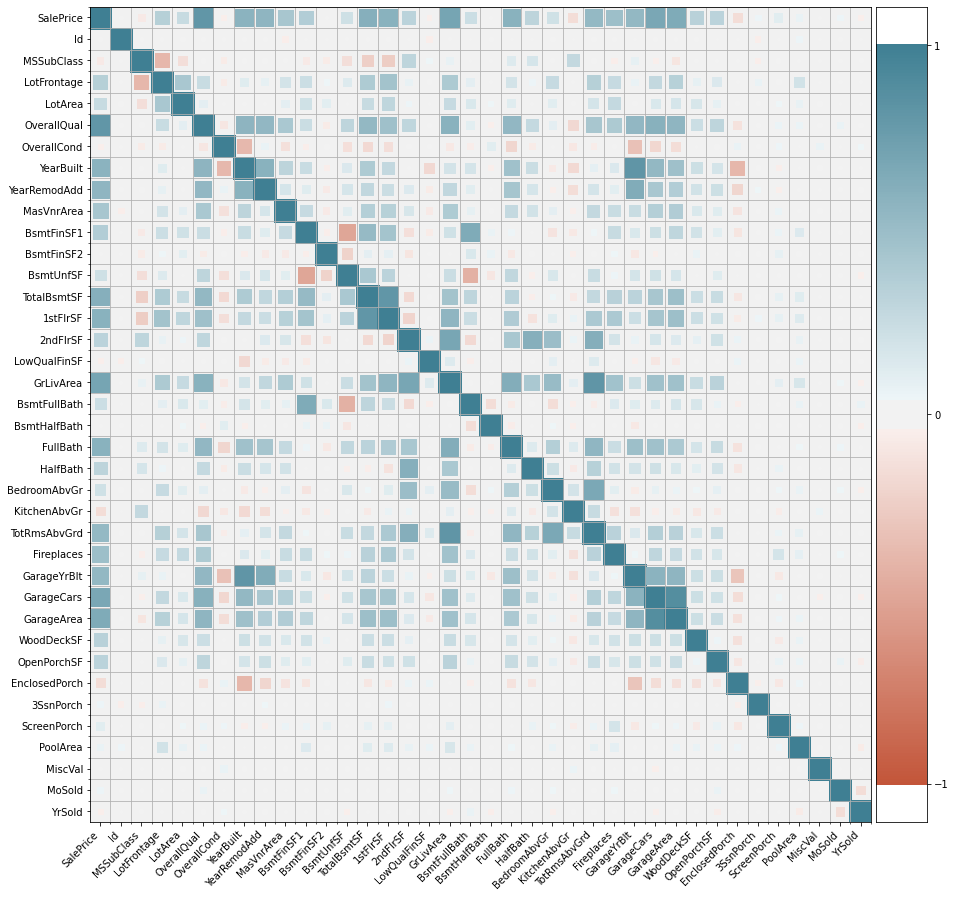

In [8]:
import heatmap
from heatmap import heatmap, corrplot
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 15))
corrplot(pd.concat([train_y,train_x],axis=1).corr())